# 課題 ボストン住宅価格予測 決定木

## データを取得する
sklearnのload_boston()メソッドを使用して、データを取得しましょう。

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

## 取得データをDataFrameにする
pd.DataFrameを使用して、データを説明変数と目的変数に分けましょう。
今回の課題では、説明変数がload_boston().dataで、目的変数は、load_boston().targetより取得できます。
※load_boston()には、データを取得した際に代入したインスタンスが入ります。

In [2]:
import pandas as pd

# columnsにはload_boston().feature_namesを指定して、カラム名を指定します。
#もしくはインスタンス.feature_names
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# columnsには、'MEDV'を指定します。
y = pd.DataFrame(boston.target, columns=['MEDV'])

## データ探索
データ探索（Exploratory data analysis）を行うことで、データ（今回の場合、ボストン住宅）を理解する手助けになります。
特に機械学習の場合、データ探索を行うことで、どのような前処理を行えばよいか、どの機械学習手法を選択するか、そして数ある特徴量の中でどの特徴を選択するかを判断することができます。
データ探索は主に以下の方法で行われます。
- 一変数の可視化 - 生データセットの各フィールドの要約統計情報を提供
- 二変数の可視化 - データセット内の各変数と目的の目標変数との関係を見つけるために実行されます
- 多変数の可視化 - データセット内の異なるフィールド間の相互作用を理解するために実行されます
- 次元削除 - データの次元数を減らし、人間が理解できる次元で可視化を行う、または次元を圧縮することで高速に計算を行う  

少し難しく感じるかもしれませんが、今回は、1変数の可視化と2変数の可視化を行います。まずは実行しながらデータ探索について慣れていきましょう。

## 基本的なデータ探索
データ探索と聞くと難しいことを想像する方もいらっしゃるかもしれませんが、データ探索の目的はシンプルで、データを理解し、データ分析・機械学習・深層学習につなげていくことです。
そこで、もっとも簡単なデータ探索から初めていきましょう。
### 基本的なデータ探索について記述せよ
以下の観点をすべて含めて記述しましょう。
- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
- それぞれのカラムは何を表しているのか

### 答え：
#### このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
　このデータは、‘Hedonic prices and the demand for clean air’という論文内で、大気汚染と住宅価格の関係を調査するために整えられたデータセットである。同論文は、Harrison, D.氏とRubinfeld, D.L.氏により執筆され、１９７６年１２月に公的に受理されたものであるから、データセットが作成されたのも同年の１９７６年と解釈できると考える

#### それぞれのカラムは何を表しているのか
- 『CRIM』：町における一人当たり犯罪率
- 『ZN』：住宅用の土地を25,000 sqft以下に分割することが禁止されている割合
- 『INDUS』：小売り以外の商用地区の割合
- 『CHAS』：1ならチャールズ川が町を流れている。０なら違う
- 『NOX』：窒素酸化物の濃度。大気汚染具合の指標になる
- 『RM』：部屋数の平均
- 『AGE』：1940年以前に建てられた住宅の割合
- 『DIS』：いくつかの雇用地の中心からの加重平均
- 『RAD』：ハイウェイへのアクセスの良さ
- 『TAX』：住宅の10,000ドルあたりの固定資産税
- 『PTRATIO』：生徒と先生の割合
- 『B』：Bkを黒人住民の割合として、$1000(Bk – 0.63)^2$
- 『LSTAT』：ステータスが下位1/3の成人の割合

- 『MEDV』： 住宅価格の中央値。この値が目的変数とされることが多い

データは全部で５０６行、欠損値はない


## 一変数の可視化
一変数の可視化についてはビジュアル的には弱いものの、Pandasのdescribeメソッドが強力です。
describeメソッドを使用することで、全体のカウント、平均、標準偏差、最小値、最大値などを把握することができます。
また、infoメソッドも欠損値の把握やどのようなカラムがあるかを把握することができます。

In [3]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## describeメソッドを用いることで把握できたこと(考察)を記述せよ
この設問は少し難しいと思われるので、まずは記述してみること、考えてみることが大切です。
以下の観点をすべて含めて記述しましょう。
- 前処理に関して気をつけるべき点
- 機械学習の手法選択に活かせること
- 機械学習の特徴選択について考えられること

## 答え：
### 前処理に関して気をつけるべき点
- 全ての変数についてcountが５０６であり、また、データセットの説明から欠損値はないことがわかっている。このため、欠損値処理を考える必要はなさそうである
-　連続値と離散値が混在しているように見てとれる。このため、各変数がどちらの値か調査した上で適切な前処理を考える必要がある
- 各変数の分布状況が様々であり、また、データセットの説明から各変数の単位もそれぞれ異なることがわかる。このため、各変数のスケールを揃える標準化、正規化を考える必要がある

### 機械学習の手法選択に活かせること
- 上述のようにこのデータでは、離散値と連続値が混在し、各変数の分布やスケールが異なる状況にある。このようなデータでも適用できるのは決定木学習であり、その中でも、住宅価格のような連続値を予測できるのは回帰木である。ただし、学習データが506件と少ないので、汎化能力確保のためハイパーパラメータを工夫する必要がある

### 機械学習の特徴選択について考えられること
- 『CHAS』の取りうる値は０と１で全体平均が約０.０７ということは、５０６件中で1だったデータは３５件程度と少ないことが分かる。有意な値が少ないと割り切って、全体のデータから１だった行を削除することで、『CHAS』という変数ごと特徴量の候補から外すことが考えられる
- 直感的に相関がありそうな変数の組がいくつかある。このような変数たちを次元削減して特徴量を絞り込むことが考えられる

## 二変数の可視化
今回の目的は住宅価格の予測であると事前に決まっているので、住宅価格（’MEDV’）とその他の変数の可視化を行います。
二変数の可視化を行う方法のひとつとして、相関とプロットが挙げられます。(他にも方法はあるので、是非検索してみてください！)
### 二変数の可視化　相関
二変数の相関を確かめるには、pandas.DataFrame.corrメソッドを使用するのが簡単です。このメソッドを使用すると、MEDV以外との相関も表示されてしまいますが、もっとも簡単に二変数の相関を出力させることができます。

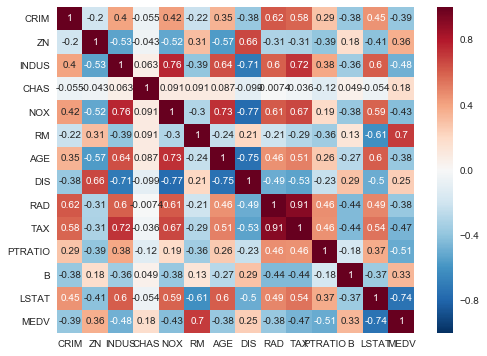

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

corr_ = pd.concat([X, y], axis=1).corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_, annot=True, annot_kws={"size": 10})

### 二変数の可視化について記述せよ　相関
この設問は少し難しいと思われるので、まずは記述してみること、考えてみることが大切です。
以下の観点をすべて含めて記述しましょう。
- そもそも相関とは何か
- MEDVにもっとも相関があると出力された変数を3つほどあげよ
- 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）

### 答え：
#### そもそも相関とは何か
 ２つ以上の事物の、一方が変われば他方もそれに連れて変わる、あるものの影響を受けてかかわり合っているなどのように、互いに関係を持つこと

#### MEDVにもっとも相関があると出力された変数を3つほどあげよ
- 『LSTAT』：-0.74
- 『RM』：0.70
- 『PTRATIO』：-0.51

#### 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）
　目的変数に対して互いに関係を持つ変数である可能性が高いため、相関がある変数を判明させることは特徴量の選択に利用できそうであると考える

### 相関の注意点について記述せよ
便利な相関であるが、落とし穴がある
- 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
- その場合、どのような手段によって、確認するべきか

### 答え：
#### 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
1. 標本数が極端に少ない場合
2. 母集団のごく一部の特徴だけを備えた標本である場合
3. 変数が名義尺度か順序尺度である場合
4. 外れ値が含まれている場合
5. 2変数が直線以外の線形の関係を示す場合
6. 2変数以外の、第三の変数が影響している場合

#### その場合、どのような手段によって、確認するべきか
- 上述1.の場合、データの標本数を確認する
- 上述2.の場合、データの入手・選定過程を確認する
- 上述3.の場合、データの集計・作成過程を確認する。散布図を描いて離散的な分布になるかどうかを確認する
- 上述4.の場合、平均と標準偏差を基準に設けた閾値から外れたデータがあるか、箱ひげ図・散布図の描画状況、生データの目視状況、などを確認する
- 上述5.の場合、散布図の描画状況を確認する。各種線形回帰分析の結果を確認する
- 上述6.の場合、データが生成された業務ロジック・ルールなど論理的な背景や因果関係を確認する。または、第三の変数の影響を除いた「偏相関係数」を確認する。1つ目の変数をx、2つ目の変数をy、第三の変数をzとおき、xとyの相関係数を$r_{xy}$、yとzの相関係数を$r_{yz}$、zとxの相関係数を$r_{zx}$とする。これらを用いると、zの影響を除いたxとyの偏相関係数$r_{xy \cdot z}$は次のように求められる
$r_{xy\cdot z} = \frac{r_{xy} - r_{xz}r_{yz}}
{\sqrt{1 - r_{xz}^2} \sqrt{1 - r_{yz}^2}}$  

[※参考URL「統計学の時間　26-4. 偏相関係数」](https://bellcurve.jp/statistics/course/9593.html)

### 二変数の可視化　プロット
MEDVと相関係数が高かった3つの変数について、それぞれプロット図を作成しましょう。
### 二変数の可視化について記述せよ　プロット
それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。

### 『LSTAT』：-0.74 について

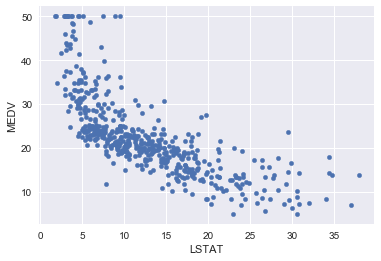

In [5]:
pd.concat([X, y], axis=1).plot.scatter(x='LSTAT', y='MEDV')

　全体的に負の相関が表れており、目立つ外れ値や直線以外に回帰する気配もない。散布図から読み取れる範囲において相関係数は信用できると考える

### 『RM』：0.70 について

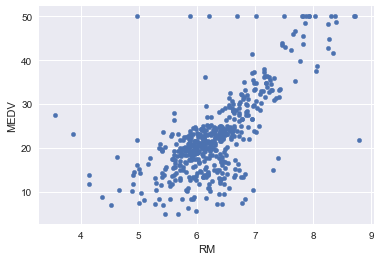

In [6]:
pd.concat([X, y], axis=1).plot.scatter(x='RM', y='MEDV')

　全体的に正の相関が表れているが、上方、左側中段、右側中段あたりに外れ値が多く見てとれる。２変数を標準化して外れ値の影響を抑えた状態でどうなるのか調査したい。散布図から読み取れる範囲において、相関係数は疑わしいと言わないまでも鵜呑みにはできないと考える

### 『PTRATIO』：-0.51 について

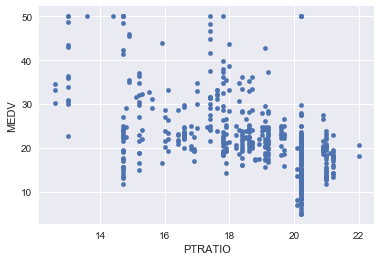

In [7]:
pd.concat([X, y], axis=1).plot.scatter(x='PTRATIO', y='MEDV')

　各点が縦軸に平行な直線状に並んでおり『PTRATIO』が離散値であることが分かる。カラムの説明では、生徒と先生の割合を示すということであったから、割合を算出する際に値が丸め込まれたのだろう。離散値である以上は値の間隔に意味が無いため、この散布図の横軸方向そのものが意味をなさないということになる。散布図から読み取れる範囲において相関係数は信用できないと考える

## データセット分割
雛形にそってデータ分割を行いましょう。
今回も学習データとテストデータの割合は、自由です。より精度が上がるように試行錯誤してください。
- 参考 データ分割の最適な比率  
https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## 学習
sklearn.tree.DecisionTreeRegressor 決定木(回帰木)を使用して、学習を行いましょう。
深さ1,2,3でそれぞれ学習を行います。

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [9]:
from sklearn.tree import DecisionTreeRegressor

d1 = DecisionTreeRegressor(max_depth=1)
d2 = DecisionTreeRegressor(max_depth=2)
d3 = DecisionTreeRegressor(max_depth=3)

d1.fit(X_train, y_train)
d2.fit(X_train, y_train)
d3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 決定係数
学習したモデル（深さ1,2,3）の決定係数を出力させましょう。

In [10]:
print(d1.score(X_test, y_test))
print(d2.score(X_test, y_test))
print(d3.score(X_test, y_test))

0.406550660354
0.743606670833
0.664712194854


## 学習曲線
まずは、学習曲線を実装して、そこから理解を深めていきましょう。
- メソッドを定義

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


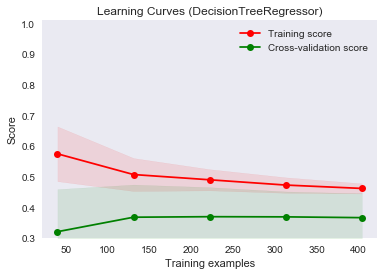

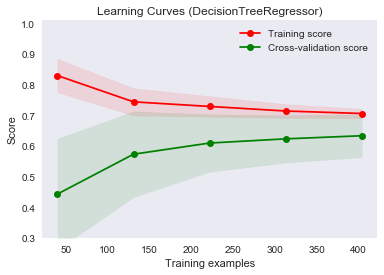

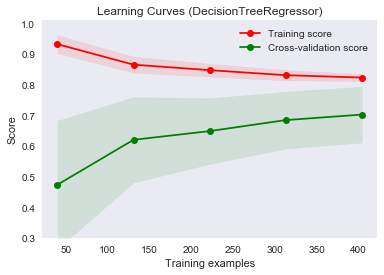

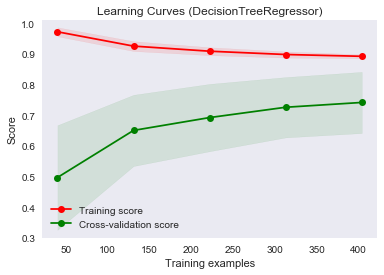

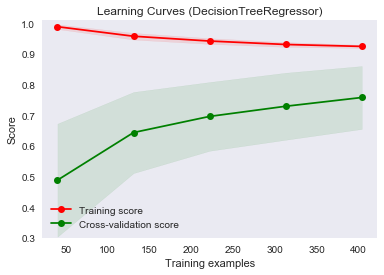

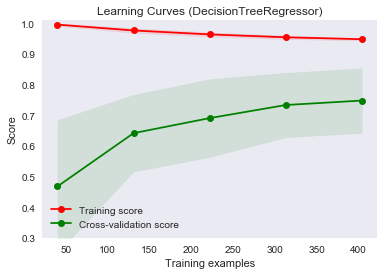

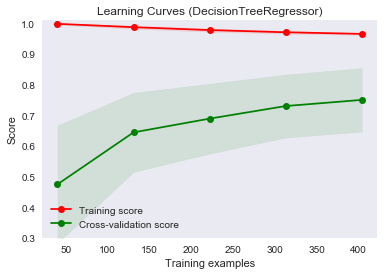

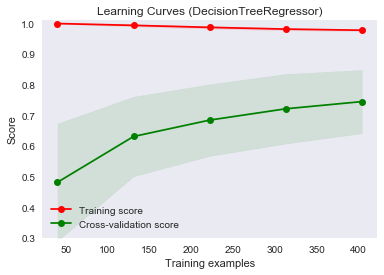

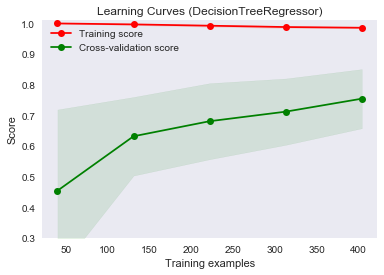

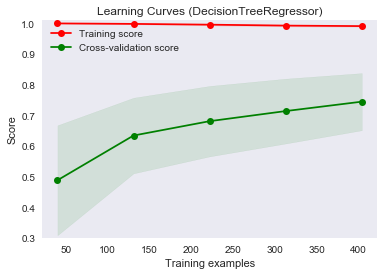

In [12]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X, y, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

## 学習曲線について記述せよ
- High varianceとは何か
- High Biasとは何か
- もっとも結果が良いと思われた深さをひとつ選択せよ
- なぜその深さが最も良いか記述せよ
- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

## 答え：
### High varianceとは何か
　High varianceの状態が過学習を示す。学習データのスコアと交差検証データのスコアの差が大きいのが特徴。この状態であれば、学習データを増やすことで一定の効果をあげることができる可能性がある

### High Biasとは何か
　High biasの状態が未学習を示す。グラフの変化が期待できず、データ数を増やしてもある一定以上には、学習データ、交差検証データともに改善がみられない。グラフの形で言えば、学習データのスコアと交差検証データのスコアの差が小さく、かつ、スコアそのものが低いという状態のときは、未学習であると考えられる

### もっとも結果が良いと思われた深さをひとつ選択せよ
もっとも結果がよいと思われるのは、深さ5である

### なぜその深さが最も良いか記述せよ
 深さ5は、上述のHigh varianceの傾向を示している。さらに、同じ傾向を示している深さ３や深さ4よりも、両方のスコアが高くなる方向で互いに近づくように収束していっている。これらにより、深さ5が最もよいと考える

### その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ
　深さ5でデータ数を増やしていくと、学習データのスコアと過学習具合が下がり、交差検証データのスコアと精度が上がって、グラフは収束に向かいモデルの汎化性能は上がると考える。以上により、結果は良くなると考える

## グリッドサーチ
話は代わり、決定木において深さはハイパーパラメータの一つですが、ハイパーパラメーターでもっとも結果がでる組み合わせを探していくのはとても大変です。学習曲線によって視覚化し決定するのも良いですが、より定量的に判断したいです。
そこで、グリッドサーチを使用して、1~11の深さの検証を行いましょう。
以下の雛形にそって、グリッドサーチを実装してください。

Kfoldの際のシャッフルを指定していないため、実行結果は異なると思いますが、4,5,6のいずれかが出力される可能性が高いです。
このようにグリッドサーチを使用することで、最適なパラメーターを探索することができます。今回はパラメーターがひとつだけでしたが、より、ハイパーパラメーターの数が増えてきたときにより真価を発揮するでしょう。

In [13]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


## グリッドサーチについて記述せよ
- グリッドサーチとは何か
- グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
- その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか

## 答え：
### グリッドサーチとは何か
　事前に決めたパラメータの組み合わせを全て試行し、評価基準に基づいた最も良いパラメータを決定する方法である。クロスバリデーションとの組み合わせで、機械学習モデルのハイパーパラメータの最適化に用いられることが多い

### グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
　パラメータの組み合わせをランダムに試行し、評価基準に基づいた最も良いパラメータを決定するランダムサーチという手法

### その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか
 ランダムサーチは、グリッドサーチよりも計算時間が短くて済むという点で優れている。グリッドサーチには、シンプルでわかりやすい上に総当たりで試行できる確実性がある。時間やリソースをかけてでも確実性を取りたい場合にはグリッドサーチ、そうで無い場合はランダムサーチ、といった使い分けが考えられる

## グリッドサーチを使いこなそう
- グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、また結果を元にどの折りたたみ回数がベストなのか考察せよ

In [14]:
for h in range(10):
    for i in [3, 5]:
        grid = GridSearchCV(estimator=regressor, param_grid=params, \
                            scoring=scoring_fnc,cv=i)
        grid.fit(X_train,y_train)
        print(grid.best_params_, end='')
    grid = GridSearchCV(estimator=regressor, param_grid=params, \
                            scoring=scoring_fnc,cv=10)
    grid.fit(X_train,y_train)
    print(grid.best_params_)

{'max_depth': 7}{'max_depth': 4}{'max_depth': 5}
{'max_depth': 10}{'max_depth': 6}{'max_depth': 5}
{'max_depth': 10}{'max_depth': 5}{'max_depth': 5}
{'max_depth': 6}{'max_depth': 6}{'max_depth': 5}
{'max_depth': 10}{'max_depth': 6}{'max_depth': 5}
{'max_depth': 7}{'max_depth': 5}{'max_depth': 4}
{'max_depth': 9}{'max_depth': 5}{'max_depth': 5}
{'max_depth': 5}{'max_depth': 6}{'max_depth': 5}
{'max_depth': 9}{'max_depth': 4}{'max_depth': 5}
{'max_depth': 8}{'max_depth': 6}{'max_depth': 5}


　上記の結果は、Kfoldの折りたたみの回数を、３回、５回、１０回で1組として、10セット出力したものである。これによると、３列目つまり１０回の折りたたみで出力のバラつきが少なく、安定していることが明らかである。このことから、３回、５回、１０回の中では、１０回の折りたたみ回数がベストであると考える

- グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ

In [15]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, \
                    scoring=scoring_fnc,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


## テスト
最後にテストデータを使用して、テストを行いましょう。グリッドサーチによって求めた深さの探索木で、学習を行い、最後に決定係数を求めます。(0.8以上の数値がでていれば合格です。)

In [16]:
from sklearn.tree import DecisionTreeRegressor

d5 = DecisionTreeRegressor(max_depth=5)
d5.fit(X_train, y_train)
print(d5.score(X_test, y_test))

0.858174710172
